In [43]:
import pandas as pd, numpy as np, scipy as sp
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [2]:
files_attr = pd.read_csv('data/hist_data/career_boosters_ids.csv', names=['start', 'end', 'genres'])

In [5]:
def generate_filename(row):
    return "data/hist_data/career_booster_dc_{}_{}_genre_{}.pkl".format(row['start'], row['end'], row['genres'])

In [66]:
example = pd.read_pickle(generate_filename(files_attr.iloc[0]))

example.head()

Index(['booster_in', 'm_genre', 'ranking', 'betweenness_centrality_subset',
       'degree_centrality', 'actor_score_before_period', 'nb_actors_boosted',
       'nb_actors_boosted_at_revelation',
       'nb_actors_boosted_before_revelation'],
      dtype='object')


,booster_in,m_genre,ranking,betweenness_centrality_subset,degree_centrality,Actor score,Boosted actors,nb_actors_boosted_at_revelation,nb_actors_boosted_before_revelation
Dennis Quaid,"(1982, 1983, 1984, 1985, 1986)",all,1,1124.359258,0.087838,250.0,13,12,1
Chevy Chase,"(1982, 1983, 1984, 1985, 1986)",all,2,859.911077,0.081081,885.0,13,8,5
Dan Aykroyd,"(1982, 1983, 1984, 1985, 1986)",all,3,938.580864,0.060811,198.0,9,4,5
William Hurt,"(1982, 1983, 1984, 1985, 1986)",all,4,765.724702,0.060811,240.5,9,7,2
Kurt Russell,"(1982, 1983, 1984, 1985, 1986)",all,5,460.692110,0.054054,142.0,8,4,4


In [79]:
fig = px.bar(example, y="betweenness_centrality_subset", labels=dict(index="Actor", betweenness_centrality_subset="Betweenness centrality"), hover_data={"Actor score": True, "Boosted actors": True, "betweenness_centrality_subset":False})
fig.update_layout(showlegend=False)
fig.write_html("test.html")

In [82]:
names = []

for _, elem in files_attr.iterrows():
    fn = generate_filename(elem)
    names.append(fn)
    pkl = pd.read_pickle(fn)
    if pkl.size == 0:
        continue
    pkl.rename(columns={"actor_score_before_period": 'Actor score', "nb_actors_boosted": "Boosted actors"}, inplace=True, errors='raise')
    fig = px.bar(pkl, y="betweenness_centrality_subset", labels=dict(index="Actor", betweenness_centrality_subset="Betweenness centrality"), hover_data={"Actor score": True, "Boosted actors": True, "betweenness_centrality_subset":False})
    fig.update_layout(showlegend=False)
    fig.write_html('img/'+fn.split('/')[-1][:-4]+".html")

print(names)

['data/hist_data/career_booster_dc_1982_1986_genre_all.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Doomsday_film_Apocalyptic_and_postapocalyptic_fiction_Dystopia_Disaster.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Detective_Detective_fiction_Crime_Thriller_Mystery.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Grossout_film_Gross_out_Romance_Film_Comedy.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Horror_Drama_Slasher_Psychological_thriller.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Family_Film_ChildrensFamily_Comedy_Animation.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Documentary_Culture__Society_Gay_Gay_Interest.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Gay_Gay_Interest_Gay_Themed_LGBT.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Antiwar_Antiwar_film_Environmental_Science_Nature.pkl', 'data/hist_data/career_booster_dc_1982_1986_genre_Environmental_Science_Nature_Sword_and_sorcery_films_Swo

<AxesSubplot: >

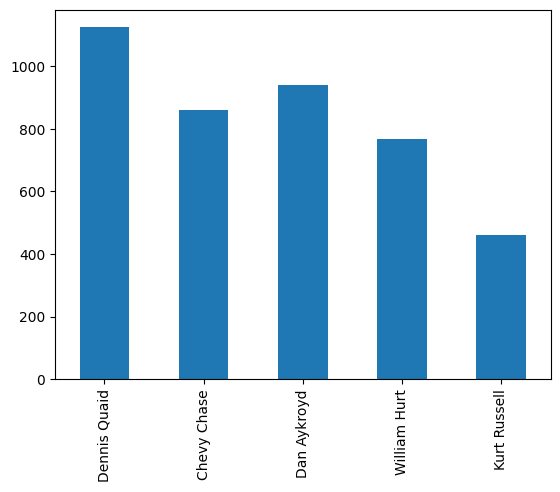